# 📊 Carga y análisis(L - Load & Analysis)

# 1. Análisis descriptivo

En esta sección obtendremos una visión general de nuestro dataset:

- Métricas de tendencia central (media, mediana).
- Medidas de dispersión (desviación estándar, mínimo, máximo).
- Conteo de valores faltantes por columna.
- Cardinalidad de las variables categóricas.

> 📌 Trabajaremos con los DataSet creados en el notebook `02_data_cleaning.ipynb`.
  


#### Carga del DataFrame

In [2]:
# Cargar dataset limpio
import pandas as pd

DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_clean = pd.read_csv(f"{DATA_DIR}/telecom_df_clean.csv")

In [3]:
# Separar columnas numéricas y categóricas
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include='object').columns

In [4]:
# --- Análisis descriptivo de numéricas ---

df_clean[num_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [5]:
# --- Análisis descriptivo de numéricas ---

desc_num = df_clean[num_cols].describe().T
desc_num['median'] = df_clean[num_cols].median()
desc_num['missing'] = df_clean[num_cols].isna().sum()

print("📊 Métricas de columnas numéricas:")
display(desc_num)

📊 Métricas de columnas numéricas:


,count,mean,std,min,25%,50%,75%,max,median,missing
SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0
tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000,29.000000,0
MonthlyCharges,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000,70.300000,0
TotalCharges,7267.0,2277.182035,2268.648587,0.000000,396.200000,1389.200000,3778.525000,8684.800000,1389.200000,0
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333,2.343333,0


In [6]:
# Análisis de categóricas

df_clean[cat_cols].describe()


,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7267,7043,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3675,3749,5086,6560,4202,3198,5189,4763,4776,5163,4477,4451,4005,4311,2445


In [7]:
# --- Análisis de categóricas ---
cat_info = pd.DataFrame({
    'unique_levels': [df_clean[c].nunique(dropna=False) for c in cat_cols],
    'missing': [df_clean[c].isna().sum() for c in cat_cols]
}, index=cat_cols).sort_values(by='unique_levels', ascending=False)

print("\n📊 Cardinalidad y valores faltantes en columnas categóricas:")
display(cat_info)


📊 Cardinalidad y valores faltantes en columnas categóricas:


,unique_levels,missing
customerID,7267,0
PaymentMethod,4,0
Churn,3,224
Contract,3,0
InternetService,3,0
Dependents,2,0
PhoneService,2,0
Partner,2,0
gender,2,0
OnlineSecurity,2,0


In [8]:
# Vista previa del dataset
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#### **Interpretación rápida**


##### **Variables numéricas**
- **SeniorCitizen** → La mayoría absoluta de clientes son no seniors (media ≈ 0.16).  
- **tenure** → gran rango (0 a 72 meses), mediana 29 meses; esto nos indica clientes nuevos y otros muy antiguos.  
- **MonthlyCharges** → media ≈ 64.7, pero con fuerte dispersión ($18.25 a $118.75).  
- **TotalCharges** → rango amplio (0 a 8,684)
- **Cuentas_Diarias** → media ≈ $2.15 $/día; proporcional a MonthlyCharges.

##### Variables categóricas  
- **Churn** → 224 valores desconocidos (estos quedarán fuera del análisis principal en `telecom_df_bin.csv`).  
- **customerID** → única por cliente.  
- **PaymentMethod**, **Contract**, **InternetService** → buena variabilidad para segmentar.  
- El resto de columnas categóricas son binarias tipo Yes/No.

---

> 💡 **Insight inicial**: El dataset tiene un balance adecuado entre variables, lo que permite hacer diferentes análisis tanto por perfiles como por métricas de consumo.



## 2. Distribución de evasión

Analizamos la proporción de clientes que permanecen (`Churn = 0`) y los que se dieron de baja (`Churn = 1`).

- Usamos `telecom_df_bin` porque tiene la culumna `Churn` en formato binario (0/1) y sin valores faltantes.
- Visualizamos tanto el conteo absoluto como la proporción.

📊 Conteo de clientes por estado de Churn:


📈  Tasa de evasión: 26.54%: 



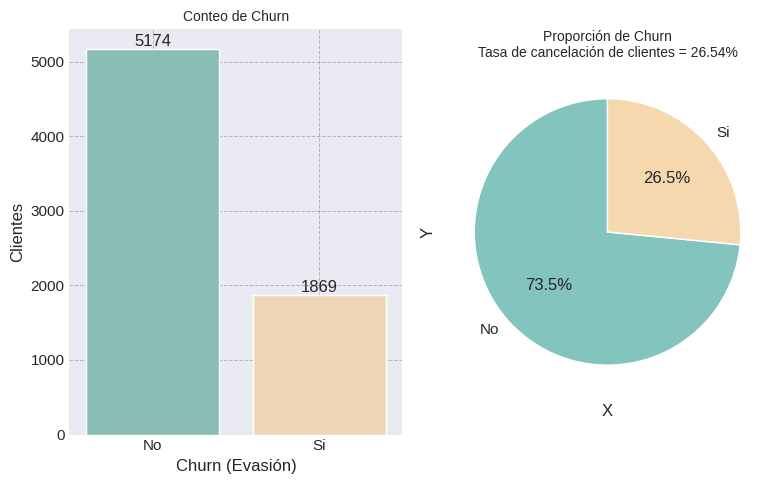

In [54]:
# Cargar dataset binario `telecom_df_bin.csv`

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_bin = pd.read_csv(f"{DATA_DIR}/telecom_df_bin.csv")

# Conteo y prporcion

churn_counts = df_bin['Churn'].value_counts()
churn_rate = df_bin['Churn'].mean()

print("📊 Conteo de clientes por estado de Churn:\n")
print(f"\n📈  Tasa de evasión: {churn_rate:.2%}: \n")


# Graficos

fig, ax = plt.subplots(1, 2, figsize=(8,5))
sns.despine()
plt.style.use('seaborn-v0_8-darkgrid')
plt.xlabel('X', family='sans-serif')
plt.ylabel('Y', family='sans-serif')
plt.grid()
coloors = ["#83c5be","#F6D8AE"]

# Conteo
sns.countplot(x='Churn', hue='Churn', data=df_bin, ax=ax[0],
              palette=coloors, legend=False)
ax[0].set_title('Conteo de Churn', fontsize=10)
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
ax[0].set_xlabel('Churn (Evasión)')
ax[0].set_ylabel('Clientes')

ax[0].set_xticks([0, 1])  # Fijar los ticks en las posiciones 0 y 1
ax[0].set_xticklabels(['No', 'Si'])
ax[0].grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.5)


# Proporcion

ax[1].pie(churn_counts, labels=['No', 'Si'], autopct='%1.1f%%',
          colors=coloors, startangle=90)
ax[1].set_title(f'Proporción de Churn\nTasa de cancelación de clientes = {churn_rate:.2%}', fontsize=10)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/conteo_ctes_churn.png", dpi=300, bbox_inches="tight")
plt.show()



In [10]:
df_bin['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


### 2.1 Distribución de evasión con Plotly

Usamos `telecom_df_bin` para graficar la proporción de clientes que permanecen (Churn = 0)  
y los que se dan de baja (Churn = 1) en un gráfico de pastel interactivo.

In [55]:
import plotly.express as px
import pandas as pd

# Cargar dataset binario
DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_bin = pd.read_csv(f"{DATA_DIR}/telecom_df_bin.csv")

# Conteo de Churn
churn_counts = df_bin['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'count']
churn_counts['Churn'] = churn_counts['Churn'].map({0: 'No', 1: 'Sí'})

# Gráfico interactivo de pastel
fig = px.pie(
    churn_counts,
    values='count',
    names='Churn',
    color='Churn',
    color_discrete_map={'No': '#ff9e00', 'Sí': '#5a189a'},
    title='Proporción de clientes por estado de Churn (evasión)',
    hole=0.3,
)

fig.update_layout(
    width=500,   # Ancho del gráfico
    height=400,  # Alto del gráfico
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.write_html("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/proporcionChurn_plotly.html")
fig.show()

### Conclusiones: Distribución de evasión (Churn)

- El dataset presenta una **tasa de churn** aproximada del 26.54%, lo que refleja una proporción significativa de clientes que deciden abandonar el servicio.

- La distribución confirma que el churn no es un fenómeno aislado, sino un patrón que debe analizarse en conjunto con otras variables para identificar sus causas.

📌 **Insight clave:** Partir de una visión general de la magnitud del churn es fundamental para enfocar el resto del análisis en la detección de variables explicativas.

---


## 3. Recuento de evasión por variables categóricas

En esta sección analizamos cómo varía la tasa de `Churn` según diferentes variables categóricas.

Se emplean **tres enfoques de visualización**:
1. **Matplotlib** → Barras apiladas para comparar volumen de clientes con y sin churn por categoría.
2. **Seaborn** → Barras con la tasa de churn ordenadas de mayor a menor.
3. **Plotly** → Gráficos interactivos, tanto de tasa como de conteo, para facilitar la exploración.



### 3.1Configuración
- Definimos una paleta de colores modificable (`COLOR_NO`, `COLOR_SI`) para distinguir entre clientes que permanecen y los que se dan de baja.
- Seleccionamos un conjunto de columnas categóricas de interés:  
  `Contract`, `PaymentMethod`, `InternetService`, `OnlineSecurity`, `TechSupport`, `PaperlessBilling`, `MultipleLines`, `StreamingTV`, `StreamingMovies`, `gender`.

In [12]:
# Configuración de colores
COLOR_NO = "#2a9d8f"   # color para Churn=0
COLOR_SI = "#e76f51"   # color para Churn=1
CATEGORICAL_PALETTE = "viridis"  # paleta de Seaborn para barras por categoría

# Columnas a analizar
cat_focus = [
    "Contract", "PaymentMethod", "InternetService",
    "OnlineSecurity", "TechSupport", "PaperlessBilling",
    "MultipleLines", "StreamingTV", "StreamingMovies", "gender"
]

# Carga de datasets
import pandas as pd
DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_clean = pd.read_csv(f"{DATA_DIR}/telecom_df_clean.csv")
df_bin   = pd.read_csv(f"{DATA_DIR}/telecom_df_bin.csv")

### 3.2 Procedimiento
- **Tabla resumen**: cálculo de la tasa de churn (`mean`) y el número de clientes (`n`) por categoría, ordenadas por mayor tasa de churn.


In [13]:
import numpy as pd

def churn_rate_table(df, col):
  out = (df.groupby(col)["Churn"]
         .agg(rate="mean", n="count")
         .sort_values(by="rate", ascending=False))
  return out

  tablas_summary = {c: churn_rate_table(df_bin, c) for c in cat_focus if c in df_bin.columns}
  for c, tab in tablas_summary.items():
    print(f"\nTabla resumen para {c}:\n")
    display(tab)


### **3.3 Gráfico Matplotlib**: barras apiladas mostrando conteos absolutos de churn vs no churn por categoría.


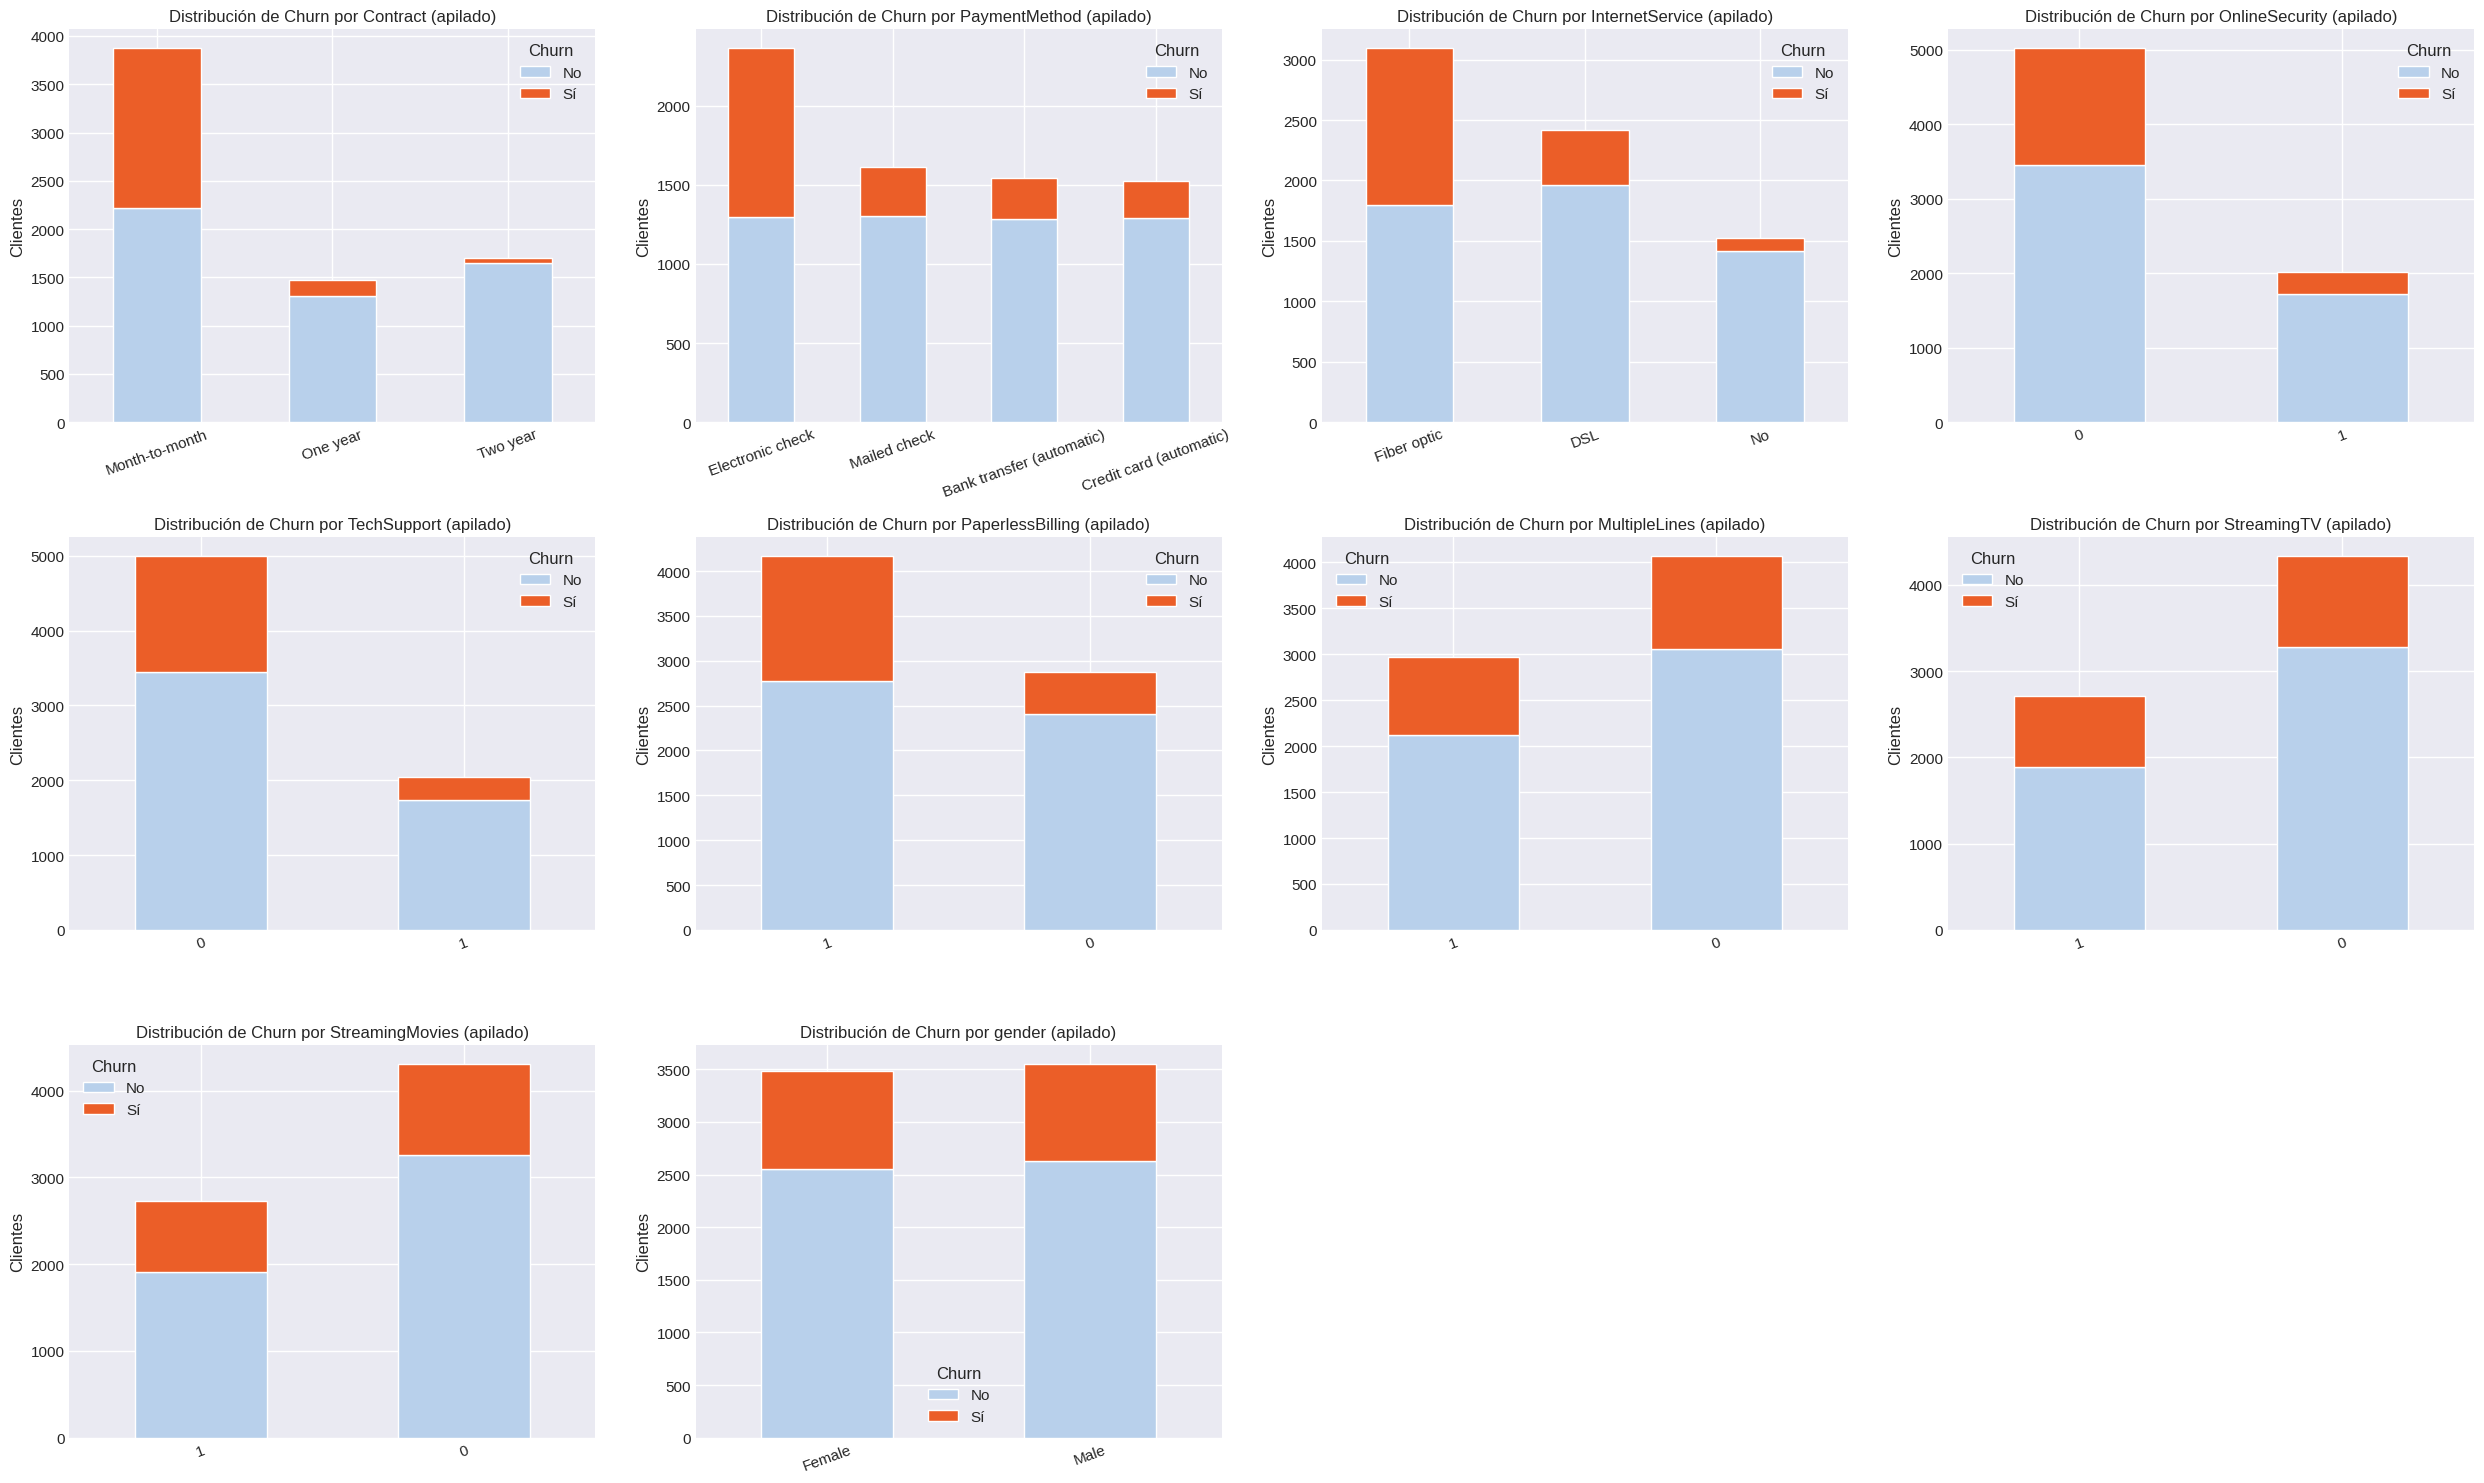

In [56]:
import matplotlib.pyplot as plt

COLOR_NO = "#b8d0eb"   # color para Churn=0
COLOR_SI = "#eb5e28"   # color para Churn=1

# Número de columnas para los subplots
num_columns = 4
num_rows = (len(cat_focus) + num_columns - 1) // num_columns  # Calcula el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4 * num_rows))  # Ajusta el tamaño de la figura


axes = axes.flatten()

for i, col in enumerate(cat_focus):
    if col not in df_bin.columns:
        continue

    counts = (df_bin
              .groupby([col, "Churn"])
              .size()
              .unstack(fill_value=0)
              .rename(columns={0:"No", 1:"Sí"}))

    # Asegurar orden por mayor tasa de churn
    order = (counts["Sí"] / counts.sum(axis=1)).sort_values(ascending=False).index
    counts = counts.loc[order]

    ax = axes[i]  # Obtener el eje correspondiente
    counts.plot(kind="bar", stacked=True, color=[COLOR_NO, COLOR_SI], ax=ax, figsize=(25, 15))

    ax.set_title(f"Distribución de Churn por {col} (apilado)")
    ax.set_xlabel("")
    ax.set_ylabel("Clientes")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

    ax.legend(title="Churn")

# Eliminar los subgráficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/barras_apiladas.png", dpi=300, bbox_inches="tight")
plt.show()


### **3.4 Gráfico Seaborn**: barras con la tasa de churn por categoría

Eje Y ("Tasa de Churn"): Este eje muestra la tasa de churn para cada categoría de la columna. La tasa de churn es el porcentaje de clientes que dejaron el servicio, donde un valor cercano a 1 (o 100%) indica una tasa de churn muy alta, y un valor cercano a 0 (o 0%) indica que la mayoría de los clientes permanecen en el servicio.

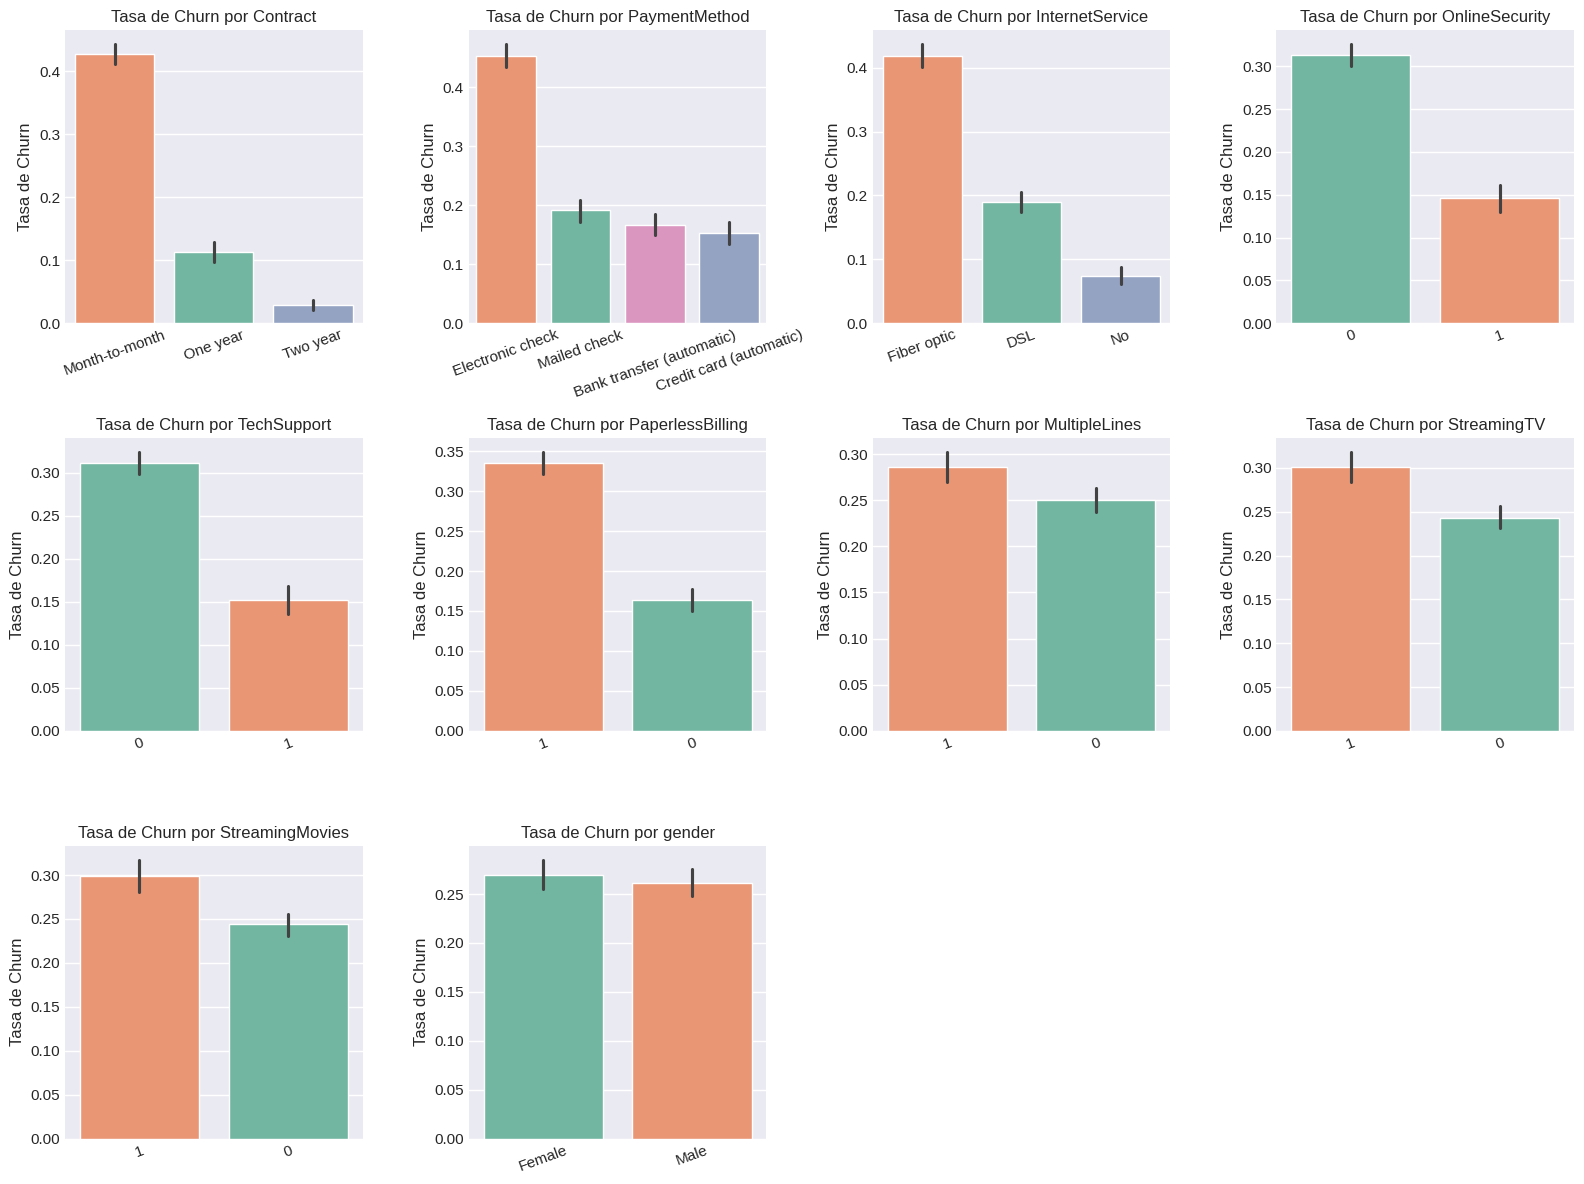

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de columnas para los subplots
num_columns = 4
num_rows = (len(cat_focus) + num_columns - 1) // num_columns  # Calcula el número de filas necesarias

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4 * num_rows))

# Aplanar el arreglo de ejes para facilitar el acceso
axes = axes.flatten()

for i, col in enumerate(cat_focus):
    if col not in df_bin.columns:
        continue

    # Calcular tasa de churn para cada categoría
    rate = df_bin.groupby(col)['Churn'].mean().reset_index()
    order = rate.sort_values('Churn', ascending=False)[col]

    # Asignar el gráfico a un eje específico
    ax = axes[i]  # Obtener el eje correspondiente
    sns.barplot(data=df_bin, x=col, y='Churn', order=order, palette="Set2", hue=col, legend=False, ax=ax)

    # Configurar título y etiquetas
    ax.set_title(f"Tasa de Churn por {col}")
    ax.set_ylabel("Tasa de Churn")
    ax.set_xlabel("")
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

# Eliminar los subgráficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/barras_tasa_churn.png", dpi=300, bbox_inches="tight")
plt.show()


#### **3.4.1 Gráfico Plotly**:
  - Barra de tasas, con hover para ver la cifra exacta.
  - Barra de conteos por estado (`No`, `Sí`) con colores personalizados.

In [59]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

COLOR_NO = "#9DC0BC"   # color para Churn=0
COLOR_SI = "#E63462"   # color para Churn=1
plt.style.use('seaborn-v0_8-darkgrid')

for col in cat_focus:
    if col not in df_bin.columns:
        continue

    # Tasa de churn
    rate = df_bin.groupby(col)["Churn"].mean().reset_index()
    fig_rate = px.bar(
        rate.sort_values("Churn", ascending=False),
        x=col, y="Churn",
        title=f"Tasa de Churn por {col}",
        color="Churn",
        color_continuous_scale="ylorrd",
        text="Churn"
    )
    fig_rate.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig_rate.update_layout(
        autosize=True,
        margin=dict(l=30, r=30, t=60, b=30),  # Margen personalizado
        showlegend=False,  # Ocultar leyenda global
        width= 500,   # Ancho del gráfico
        height= 400,  # Alto del gráfico
    )

    # Conteo por estado
    counts = (df_bin
              .groupby([col, "Churn"])
              .size()
              .reset_index(name="count"))
    counts["Churn"] = counts["Churn"].map({0:"No", 1:"Sí"})

    fig_cnt = px.bar(
        counts, x=col, y="count", color="Churn",
        barmode="group",
        color_discrete_map={"No": COLOR_NO, "Sí": COLOR_SI},
        title=f"Conteo de clientes por {col} y estado de Churn",
        text="count"
    )
    fig_cnt.update_traces(textposition="outside")
    fig_cnt.update_layout(
        width= 600,     # Ancho del gráfico
        height= 500,    # Alto del gráfico
    )

    # Crear la figura con subgráficos
    fig = make_subplots(
        rows=1, cols=2,  # Definir una grilla de 1 fila y 2 columnas
        subplot_titles=[f"Tasa de Churn por {col}", f"Conteo de clientes por {col} y estado de Churn"]
    )

    # Añadir los gráficos a las posiciones correspondientes
    for trace in fig_rate.data:
        fig.add_trace(trace, row=1, col=2)  # Primer gráfico en la columna 1

    for trace in fig_cnt.data:
        fig.add_trace(trace, row=1, col=1)   # Segundo gráfico en la columna 2

    fig.update_layout(
        autosize=True,
        margin=dict(l=30, r=30, t=60, b=30),
        width=1080,
        height=400,
        showlegend=False  # Desactivar la leyenda global
    )

    fig.show()

Conclusiones: Recuento de evasión por variables categóricas

- Algunas variables muestran **diferencias marcadas en las proporciones de churn**:
  - **Contract**: los contratos mensuales concentran el mayor porcentaje de churn, en contraste con los contratos de uno o dos años.
  - **InternetService**: clientes con servicio de fibra óptica presentan mayor churn que los de DSL o sin servicio.
  - **PaymentMethod**: pagos automáticos por transferencia bancaria o tarjeta de crédito presentan menor churn comparados con otros métodos manuales.
  - **Dependents** y **Partner**: la ausencia de dependientes o pareja parece asociarse con una mayor probabilidad de churn.

- Gráficos de barras apiladas y normalizadas muestran patrones claros:
  - Algunos servicios opcionales o adicionales, como **TechSupport** o **OnlineSecurity**, se correlacionan con menor churn.
  - Variables con distribución de categorías más balanceada facilitan identificar este tipo de asociaciones.

📌 **Insight clave:** La combinación de contrato mensual, servicio de fibra y métodos de pago manuales podría representar un perfil de cliente con mayor propensión a la evasión.



## 4. Evasión frente a variables numéricas

En esta sección analizamos cómo se comportan variables numéricas que son clave entre clientes que se dieron de baja (`Churn = 1`) y los que permanecen (`Churn = 0`).

### Objetivo
- Identificar rangos de valores asociados a mayor o menor probabilidad de evasión.
- Explorar patrones que puedan explicar diferencias entre grupos de clientes.

### Métricas analizadas
- **TotalCharges** → gasto total acumulado.
- **MonthlyCharges** → gasto mensual actual.
- **tenure** → tiempo de permanencia (meses).
- **Cuentas_Diarias** → gasto diario estimado.

### Gráficos utilizados
1. **KDE (Seaborn)** → curvas de densidad por Churn para ver la forma de la distribución.
2. **Boxplots (Seaborn)** → comparación de medianas y dispersión.
3. **Violin plots (Plotly)** → densidad y estadísticos combinados de forma interactiva.
4. **Scatter plots (Plotly)** → relaciones entre variables numéricas coloreadas por Churn.

In [17]:
# Configuración
COLOR_NO = "#77BFA3"   # Color para Churn = 0
COLOR_SI = "#8783D1"   # Color para Churn = 1

# Variables numéricas a analizar
NUM_FOCUS = ["MonthlyCharges", "TotalCharges", "tenure", "Cuentas_Diarias"]

# Mapas de color
SEABORN_NUM_PALETTE = {0: COLOR_NO, 1: COLOR_SI}
PLOTLY_DISCRETE_MAP = {0: COLOR_NO, 1: COLOR_SI}

# Carga de datos
import pandas as pd
DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_bin = pd.read_csv(f"{DATA_DIR}/telecom_df_bin.csv")

# Asegurar tipos numéricos
for col in NUM_FOCUS:
    df_bin[col] = pd.to_numeric(df_bin[col], errors="coerce")

In [18]:
df_bin.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### 4.1 Distribuciones KDE por estado de Churn (Seaborn)

- Muestran la forma de la distribución para cada grupo de Churn.
- Permiten detectar diferencias en rangos y concentración de valores.

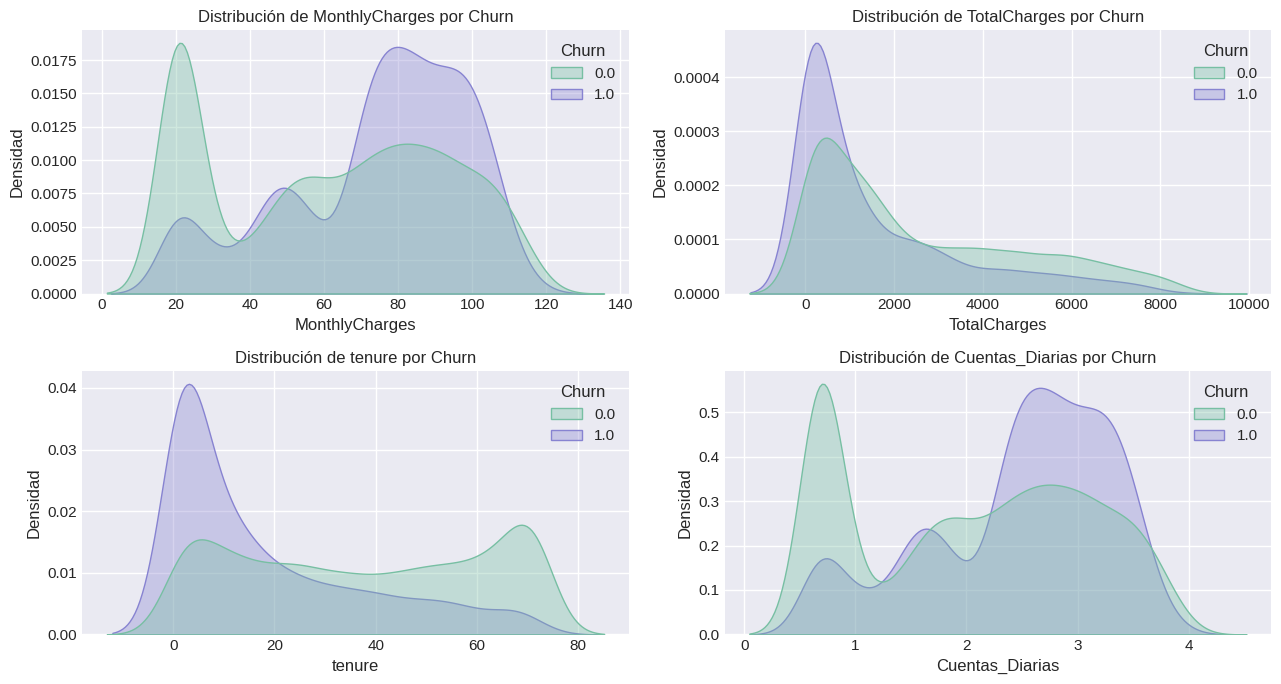

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(13, 7))
axes = axes.flatten()

for ax, col in zip(axes, NUM_FOCUS):
    sns.kdeplot(
        data=df_bin, x=col, hue="Churn",
        fill=True, common_norm=False, alpha=0.35,
        palette=SEABORN_NUM_PALETTE, ax=ax
    )
    ax.set_title(f"Distribución de {col} por Churn")
    ax.set_xlabel(col)
    ax.set_ylabel("Densidad")

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/kde_churn.png", dpi=300, bbox_inches="tight")
plt.show()

### 4.2 Boxplots por estado de Churn con (Seaborn)

- Comparan mediana, cuartiles y valores atípicos.
- Útiles para visualizar diferencias centrales y dispersión.

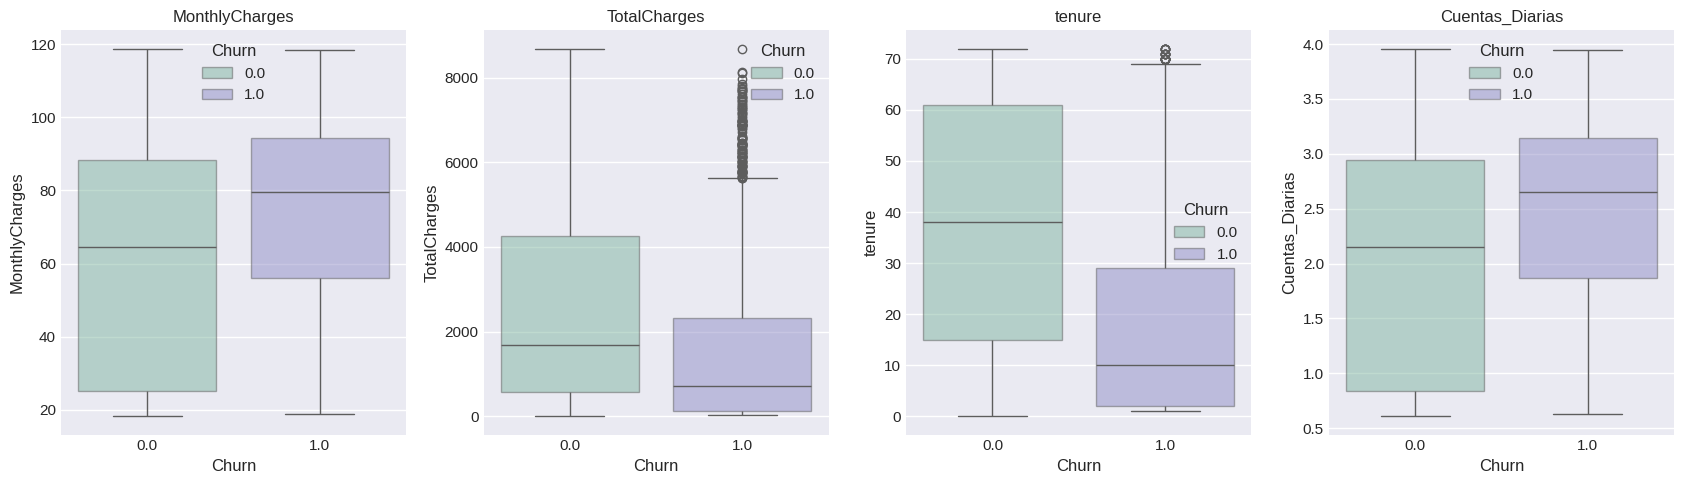

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
COLOR_NO = "#77BFA3"   # Color para Churn = 0
COLOR_SI = "#8783D1"   # Color para Churn = 1
ALPHA = 0.5  # Opacidad

fig, axes = plt.subplots(1, len(NUM_FOCUS), figsize=(17, 5))

for ax, col in zip(axes, NUM_FOCUS):
    sns.boxplot(
        data=df_bin,
        x="Churn", y=col, hue="Churn",
        palette=[COLOR_NO, COLOR_SI],
        ax=ax,
        boxprops=dict(alpha=ALPHA)
    )
    ax.set_title(col)
    ax.set_xlabel("Churn")
    ax.set_ylabel(col)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/boxplots_churn.png", dpi=300, bbox_inches="tight")
plt.show()


### 4.3 Violin plots interactivos (Plotly)

- Combinan densidad y estadísticos.
- Permiten explorar la forma y dispersión de cada variable según el estado de Churn.

In [21]:
import plotly.express as px

for col in NUM_FOCUS:
  fig = px.violin(
      df_bin, y=col, x="Churn", color="Churn",
      box=False, points="all",
      color_discrete_map=PLOTLY_DISCRETE_MAP,
      title=f"Distribución de {col} por Churn",
      labels={"Churn": "Estado de Churn", col: col},
      category_orders={"Churn": [0, 1]}
  )

  fig.update_xaxes(tickmode="array", tickvals=[0, 1], ticktext=["No", "Si"])
  fig.update_layout(
      legend=dict(
      traceorder="normal",
      font=dict(size=12),
      title_font=dict(size=14),
      )
    )

  fig.show()

### 4.4 Scatter plots interactivos (Plotly)

- Muestran relaciones entre pares de variables numéricas.
- Coloreados por Churn para identificar zonas con mayor o menor evasión.

In [22]:
pairs = [
    ("tenure", "TotalCharges"),
    ("MonthlyCharges", "TotalCharges"),
    ("tenure", "MonthlyCharges"),
    ("Cuentas_Diarias", "tenure")
]

for x, y in pairs:
  fig = px.scatter(
      df_bin, x=x, y=y, color="Churn",
      color_discrete_map="Viridis",
      title=f"Relación {x} vs {y} por Churn",
      hover_data=df_bin.columns
  )

  fig.update_layout(
      width=920,   # Ancho del gráfico
      height=400,  # Alto del gráfico
  )
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Conclusiones: Variables numéricas

- Las distribuciones **KDE** muestran diferencias claras en algunas variables:
  - **tenure (Permanencia)**: clientes con menor tiempo de permanencia concentran gran parte de las evasiones (Churn = 1).
  - **MonthlyCharges (Cargos Mensuales)**: Existe concentración de churn en valores medios-altos, lo que sugiere una posible sensibilidad al precio.
  - **TotalCharges (Cargos Totales)**: Los clientes con menor gasto total se dan de baja con más frecuencia, porque también llevan poco tiempo en la compañía.
  - **Cuentas_Diarias (Cargo Diario)**: Los clientes con gastos más altos parecen correlacionarse con mayor churn, especialmente en clientes nuevos.

- Los **boxplots** confirman que la mediana de permanencia en clientes que se van es significativamente menor, mientras que la mediana de Cargos Mensuales es mayor que la de los que permanecen.

- Los **violin plots** y **scatter plots** zonas claras de concentración de churn:
  - Baja permanencia y altos cargos mensuales.
  - Bajos cargos totales combinado con baja permanencia.


📌 **Insight clave:** La combinación de poca antigüedad y costo medio/alto mensual podría reslatar un segmento de clientes en riesgo, probablemente porque no han consolidado su fidelidad y perciben un costo elevado del servicio.

## 5. Análisis de correlación entre variables

Este sección conecta los hallazgos descriptivos con relaciones estadísticas directas. Buscamos qué variables numéricas muestran mayor relación con la evasión, con atención en “Cuentas_Diarias” y “Servicios_Contratados”. Incluye visualizaciones en Seaborn y Plotly y una tabla ordenada de correlaciones con Churn.

---


### Objetivo y alcance

- **Objetivo:** Identificar variables con mayor relación lineal con `Churn` para guiar la selección de features en modelos predictivos.
- **Enfoque:** Pearson sobre variables numéricas con `pandas.DataFrame.corr()`, visualización vía heatmaps, dispersión y tasa media de churn por nivel.
- **Foco:**
    - **Cuentas_Diarias ↔ Churn** (posible sensibilidad temprana).
    - **Servicios_Contratados ↔ Churn** (valor percibido vs complejidad/costo).


### Preparación de datos

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


sns.set(style="dark")

# Personalizacion
CMAP_CONT = "Viridis"
COLOR_MAP_CHURN = {0: "C2EABD", 1:"ED254E"}

POINT_COLOR = "#5B8FF9"
HIHGLIGHT_COLOR = "#E76F51"

# Generar un nuevo DataFram
df_trabajo = df_bin.copy()



In [27]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [28]:
df_trabajo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [29]:
service_cols = [
    "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]


In [30]:
df_bin[service_cols].head()

,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,0,1,0,1,1,0
1,1,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,1,1,0,1,1
4,1,0,0,0,0,1,1,0


In [31]:
for col in service_cols:
    print(f"{col}: {df_bin[col].unique()}")


PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]


In [63]:
df_bin["Servicios_Contratados"] = df_bin[service_cols].sum(axis=1)

In [64]:
df_bin[["customerID", "Servicios_Contratados"] + service_cols].head(10)

,customerID,Servicios_Contratados,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,4,1,0,0,1,0,1,1,0
1,0003-MKNFE,3,1,1,0,0,0,0,0,1
2,0004-TLHLJ,2,1,0,0,0,1,0,0,0
3,0011-IGKFF,5,1,0,0,1,1,0,1,1
4,0013-EXCHZ,3,1,0,0,0,0,1,1,0
5,0013-MHZWF,4,1,0,0,0,0,1,1,1
6,0013-SMEOE,7,1,0,1,1,1,1,1,1
7,0014-BMAQU,4,1,1,1,0,0,1,0,0
8,0015-UOCOJ,2,1,0,1,0,0,0,0,0
9,0016-QLJIS,8,1,1,1,1,1,1,1,1


Correlacines con Churn:
Churn                    1.000000
Cuentas_Diarias          0.193356
Servicios_Contratados   -0.067264
Name: Churn, dtype: float64


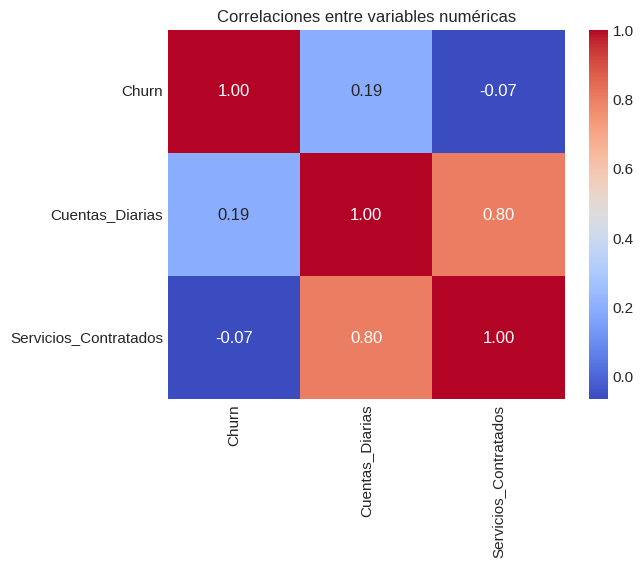

In [65]:
import pandas as pd
import numpy as np


# Correlación Númerica

corr_cols = ["Churn", "Cuentas_Diarias", "Servicios_Contratados"]
corr_matrix = df_bin[corr_cols].corr()

print("Correlacines con Churn:")
print(corr_matrix["Churn"].sort_values(ascending=False))

# Heatmap

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/heatmap_corr.png", dpi=300, bbox_inches="tight")
plt.show()


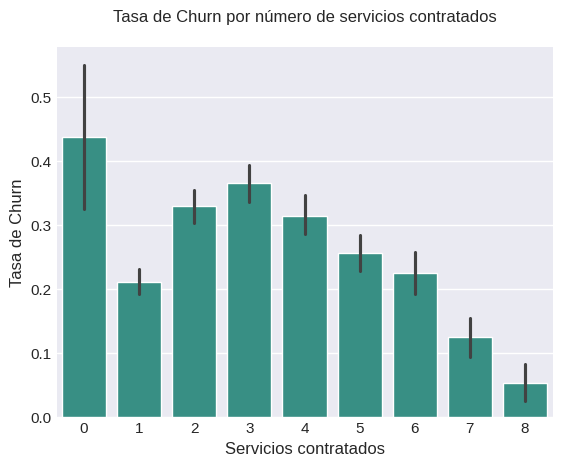

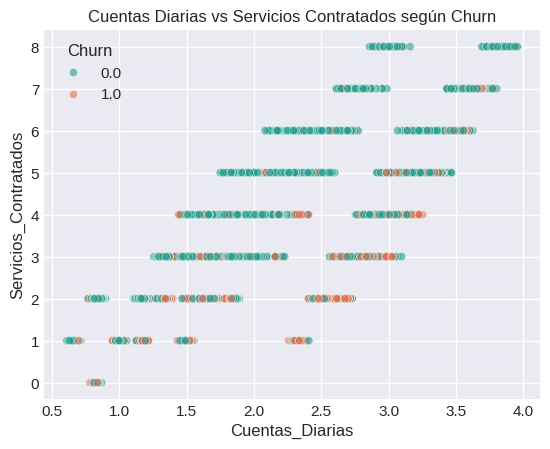

In [67]:
# Relacion Servicios_Contratados vs Churn

sns.barplot(
    data=df_bin, x="Servicios_Contratados", y="Churn",
    estimator=lambda x: sum(x)/len(x), color="#2a9d8f"
)

plt.title("Tasa de Churn por número de servicios contratados\n")
plt.ylabel("Tasa de Churn")
plt.xlabel("Servicios contratados")
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/barplot_servicios_churn.png", dpi=300, bbox_inches="tight")
plt.show()

# Relacion Cuentas_Diarias vs Servicios_Contratados (color por churn)

sns.scatterplot(
    data=df_bin, x="Cuentas_Diarias", y="Servicios_Contratados",
    hue="Churn", alpha=0.6, palette={0:"#2a9d8f", 1:"#e76f51"}
)
plt.title("Cuentas Diarias vs Servicios Contratados según Churn")
plt.savefig("/content/drive/MyDrive/challenge-TelecomX-ETL/src/graficos/scatter_cuentas_servicios.png", dpi=300, bbox_inches="tight")
plt.show()


### Conclusiones — Sección 5: Correlaciones

- La matriz de correlación muestra que:
  - **`Cuentas_Diarias`** presenta una correlación positiva significativa con `Churn`: a mayor gasto diario promedio, existe una mayor probabilidad de cancelación.
  - **`Servicios_Contratados`**, calculada como la suma de servicios activos por cliente, presenta una correlación **negativa** con `Churn`: los clientes con más servicios contratados tienden a mostrar menor propensión a la evasión.
  - El resto de variables numéricas mantienen correlaciones más bajas con `Churn`, lo que sugiere que su efecto puede depender de interacciones o de relaciones no lineales.

- El análisis por quintiles de `Cuentas_Diarias` revela que los niveles más altos concentran mayor churn, lo que podría indicar **sensibilidad al precio** entre ciertos segmentos.

- El análisis de `Servicios_Contratados` evidencia que:
  - Los clientes con 0 a 2 servicios son los más propensos a cancelar.
  - A partir de 5 servicios, la tasa de churn disminuye considerablemente, posiblemente por el **mayor valor percibido** o **costos de cambio más altos**.

📌 **Insight clave:**  
- Existen dos ejes claros de riesgo/retención:
  1. **Costo relativo alto** (Cuentas_Diarias elevadas) → mayor riesgo.
  2. **Pocos servicios contratados** → menor fidelización y mayor probabilidad de baja.

  ---
  

# Informe Final: Análisis de Evasión de Clientes en Telecom X

## Introducción

En el contexto del proyecto "Churn de Clientes" de Telecom X, este análisis tiene como objetivo identificar los factores clave que contribuyen a la evasión de clientes (Churn), con el fin de desarrollar estrategias predictivas y de retención. La compañía enfrenta una elevada tasa de cancelaciones, lo que impacta directamente en sus ingresos y costos operativos.  


Para este estudio, se llevó a cabo un proceso **ETL** (Extracción, Transformación y Carga) que permitió recopilar y procesar información detallada de los clientes, incluyendo datos demográficos, servicios contratados, así como información contractual y financiera.

El análisis se basa en un conjunto de datos `DataSet` compuesto por **7,267 clientes**, en el que se examina la relación entre variables como la antigüedad (_tenure_), los cargos mensuales (_MonthlyCharges_), la contratación de servicios adicionales y la presencia de _churn_. Los insights obtenidos servirán de base para que el equipo de _Data Science_ desarrolle modelos predictivos orientados a disminuir la evasión, actualmente estimada en **26.5%** de los clientes con _churn_ identificado (1,869 casos de "Yes" sobre 7,043 registros válidos).


## Limpieza y Tratamiento de Datos

Los pasos de extracción, limpieza y transformación se realizaron en dos notebooks principales: `01_data_extraction.ipynb` y `02_data_cleaning.ipynb`. A continuación, se detalla el proceso:

### Extracción de Datos (`01_data_extraction.ipynb`)
* **Fuente de datos**: Los datos se extrajeron de la [API de Telecom X](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json). en formato JSON.
* **Proceso**:
  * Se utilizó la librería `requests` para realizar una solicitud HTTP y obtener el JSON.
  * El JSON se convirtió en un DataFrame de Pandas con 7267 filas y 6 columnas iniciales (customerID, Churn, customer, phone, internet, account).
  * Se realizó una exploración inicial:
    * Identificando columnas anidadas (diccionarios en customer, phone, internet y account) y conteo de valores únicos en Churn (Yes/No/vacíos).
* **Guardado**:
  * Los datos crudos se almacenaron en `/data/raw/telecomx_raw.json` para traceability.

### Transformación y Limpieza (`02_data_cleaning.ipynb`)
- **Desanidado de columnas**:
	- Las columnas anidadas se expandieron en variables individuales (gender, SeniorCitizen, InternetService, MonthlyCharges ,etc.), resultando en un DataFrame plano con 21 columnas.
- **Tratamiento de valores inconsistentes**:
	* Valores como "No phone service" y "No internet service" se unificaron a "No" para simplificar el análisis.
	- Conversión de tipos: `TotalCharges` a float (manejo de espacios vacíos como NaN), `SeniorCitizen` a int, y variables categóricas a string.
	- Imputación: Valores faltantes en `TotalCharges` se rellenaron con 0 para clientes nuevos (tenure=0).
- **Creación de variables derivadas**:
	- `Cuentas_Diarias`: Calculada como `MonthlyCharges / 30` para estimar el gasto diario promedio.
	- Variables binarias: Todas las columnas Yes/No se convirtieron a 1/0 (e.g., Partner_bin, Churn_bin).
	- `Servicios_Contratados`: Suma de servicios activos (e.g., PhoneService, OnlineSecurity, etc.).
- **Separación de datasets**:
	- Registros con Churn conocido (7043 filas) vs. desconocido (224 filas).
	- Generación de tres versiones: `telecom_df_full.csv` (34 columnas, incluye originales, binarias y derivadas), `telecom_df_clean.csv` (22 columnas, limpias + `Cuentas_Diarias`), `telecom_df_bin.csv` (22 columnas, binarias + `Cuentas_Diarias`).
- **Guardado**: Archivos procesados en `/data/processed/`.

> Este proceso aseguró datos limpios y listos para análisis, eliminando duplicados y manejando ~3% de valores faltantes en Churn. El análisis siguiente se basa en `telecom_df_clean.csv` y validaciones mediante ejecución de código en Python.

## Análisis Exploratorio de Datos

El EDA se realizó en `03_data_analysys.ipynb`, enfocándose en métricas descriptivas, distribuciones y relaciones. Se utilizaron librerías como Pandas y Matplotlib para cómputos y visualizaciones. A continuación:

### 1. Análisis Descriptivo de los Datos
Se calcularon métricas de tendencia (media, mediana), dispersión (desviación estándar, mínimo, máximo) y distribución para variables numéricas y categóricas, basadas en el dataset de 7267 clientes.

**Variables numéricas**

El análisis de los datos numéricos revela algunos patrones interesantes:

  * **Antigüedad (Tenure):** En promedio, los clientes llevan 32 meses Telecom X, pero muchos son relativamente nuevos, lo que genera una alta variabilidad en el tiempo de permanencia (de 0 a 72 meses).
  * **Cargos mensuales (MonthlyCharges):** La mayoría paga alrededor de 70 USD al mes al mes, aunque hay casos con pagos mucho más altos, lo que indica la presencia de clientes con servicios premium.
  * **Cargos totales (TotalCharges):** Los montos acumulados varían mucho, desde clientes que apenas han iniciado hasta quienes han pagado más de 8,600 USD, reflejando la diversidad en el tiempo de relación con Telecom X.
  * **Gasto diario estimado (Cuentas_Diarias):** En promedio, el gasto diario es de 2.16 USD, pero algunos clientes llegan a gastar casi el doble, lo que podría indicar sensibilidad al precio en ciertos segmentos.

**Variables categóricas**

En cuanto a las variables cualitativas, se observan las siguientes tendencias:

  * **Género:** Distribución equilibrada entre hombres (50.8%) y mujeres (49.2%).

  * **Estado civil (Partner):** 51.7% de los clientes no tienen pareja, frente a un 48.3% que sí.

  * **Dependientes:** El 70% no tiene dependientes, mientras que el 30% sí.

  * **Servicio de internet:** 42.6% cuenta con fibra óptica, 33.3% con DSL y 21% no tiene servicio de internet.

  * **Tipo de contrato:** 53.3% tiene contratos mensuales, 23.3% contratos de dos años y 20.3% de un año, lo que refleja una alta preferencia por contratos de corta duración.

  * ** Método de pago:** El pago con cheque electrónico es el más común (32.5%), seguido por cheque por correo (22.2%), transferencia bancaria (21.2%) y tarjeta de crédito (20.9%).


> Estas métricas sugieren un perfil de cliente típico: adulto no senior, con servicios de internet, pero variabilidad en lealtad (tenure).

### 2. Distribución de Evasión
La variable Churn (evasión) se distribuye de manera desbalanceada:
- No: 73.5% (5174 clientes).
- Yes: 26.5% (1869 clientes).
- Vacíos/Desconocidos: 3% (224, excluidos del análisis principal).

> Esto indica un problema significativo de churn, pero con mayoría retenida. La distribución es bimodal: alto churn en clientes nuevos (<12 meses) y bajo en leales (>48 meses).

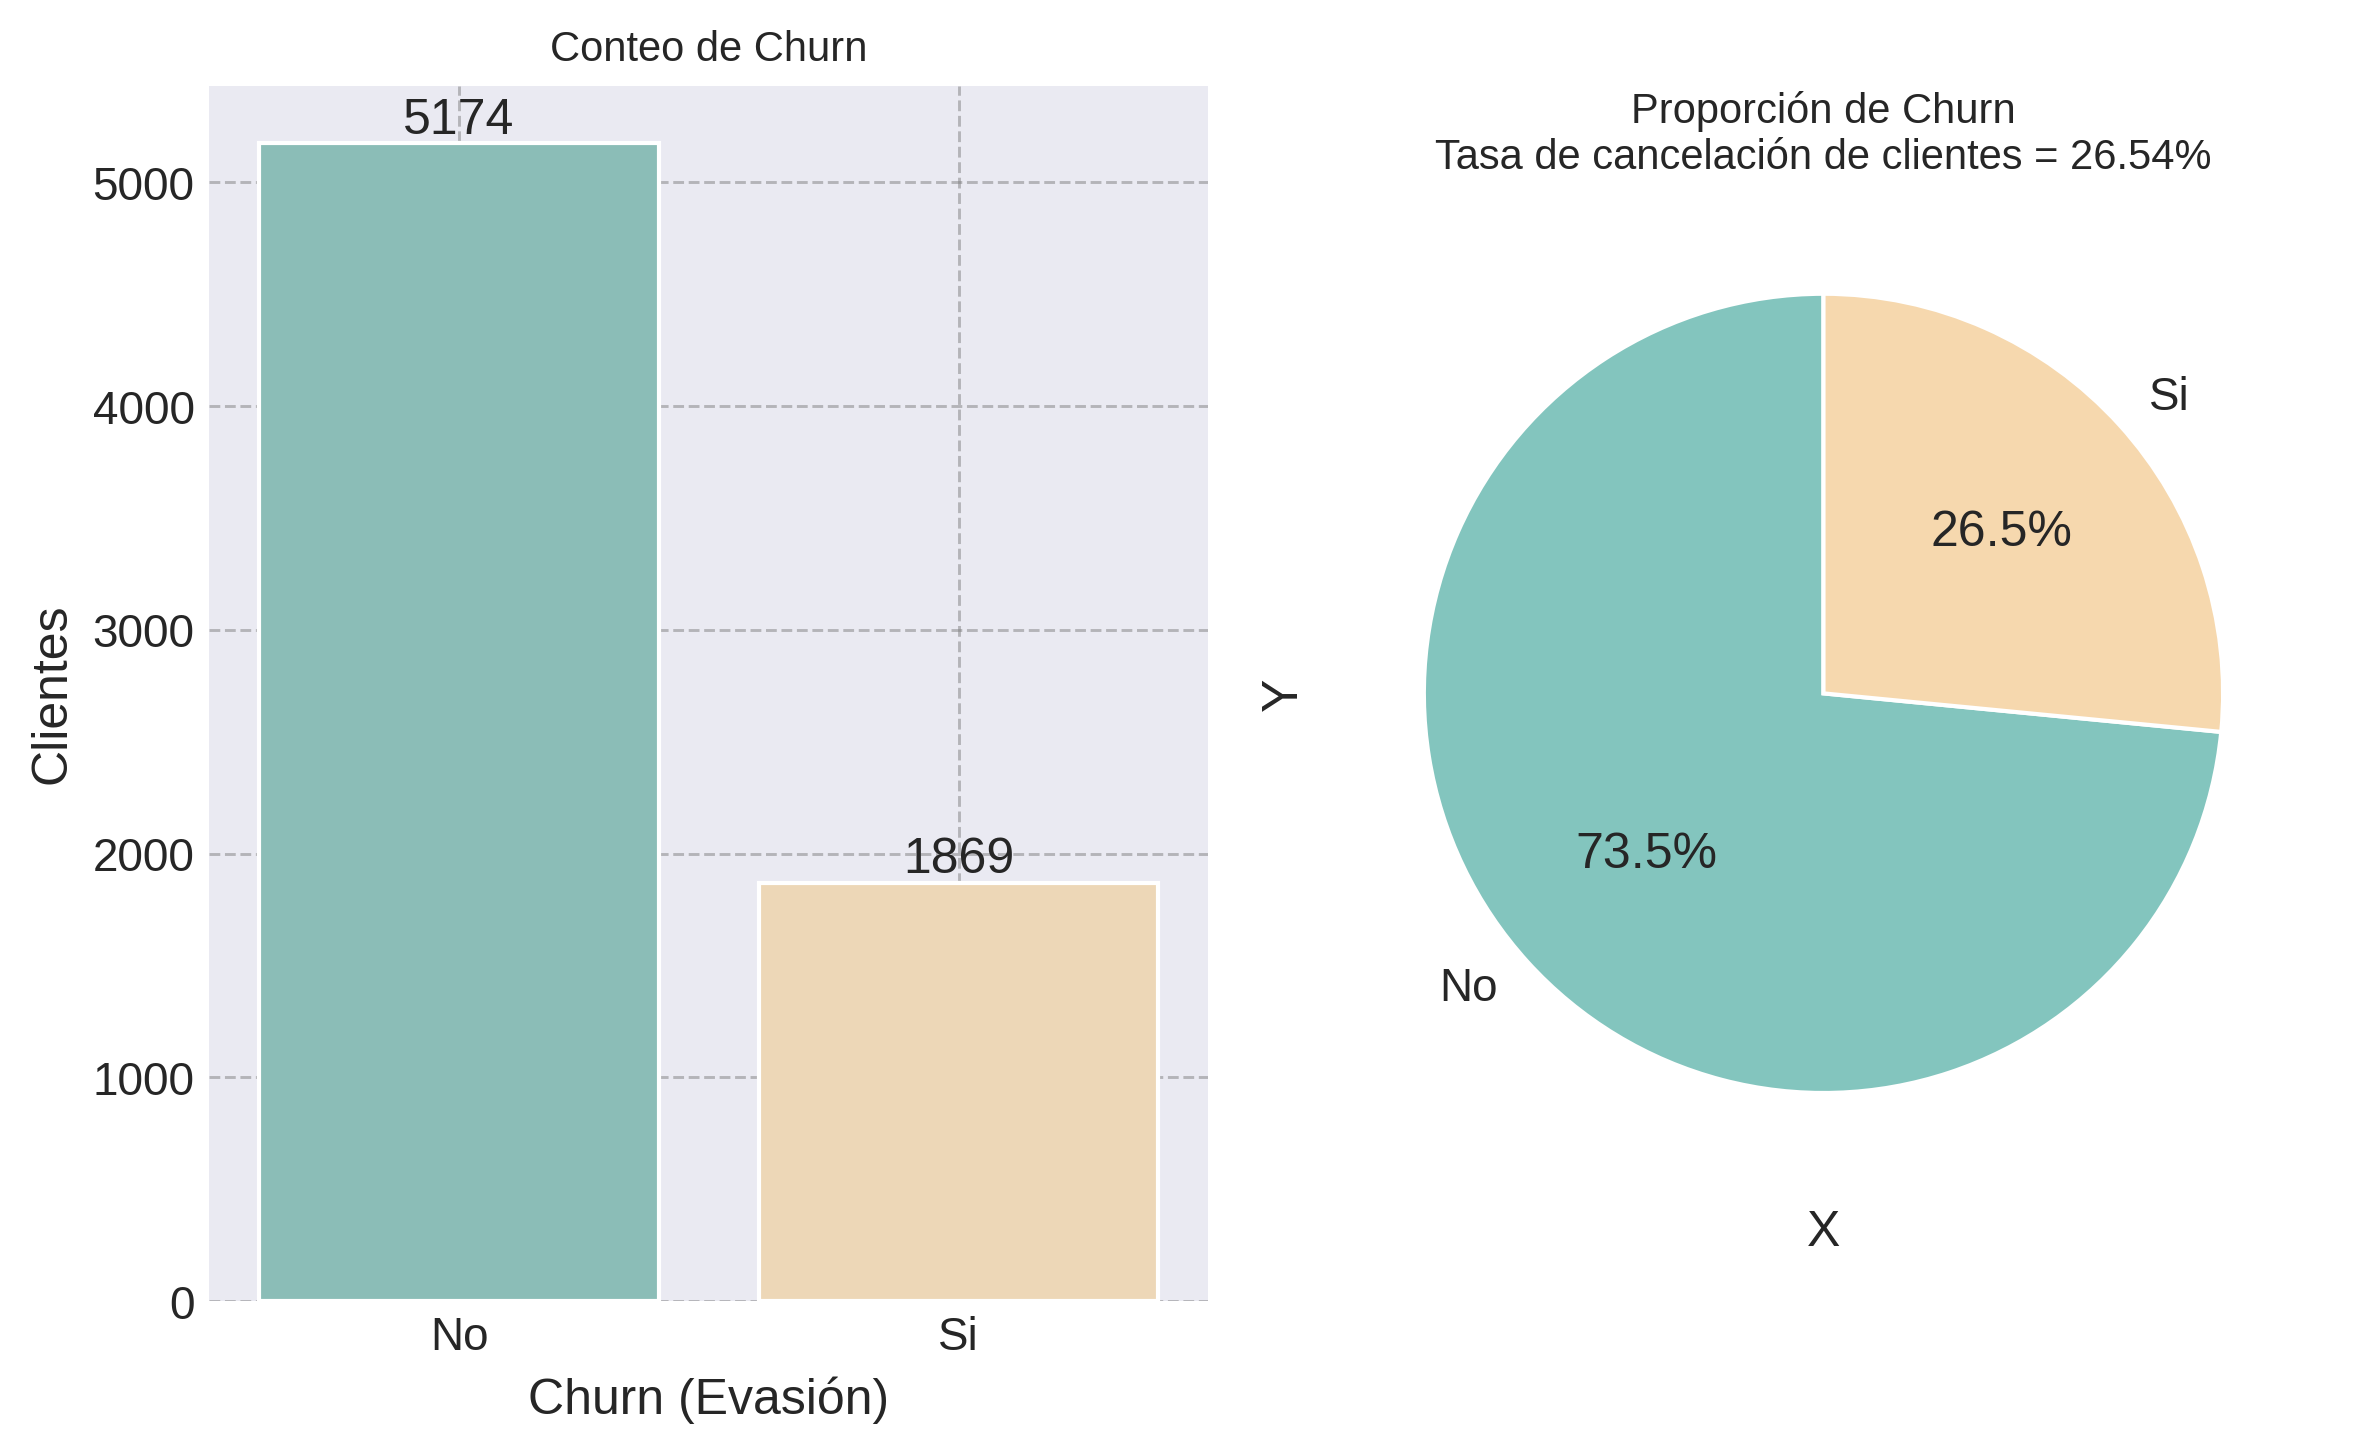

### 3. Recuento de Evasión por Variables Categóricas
Se examinó la proporción de clientes que cancelan (churn) según distintas categorías, y los resultados muestran tendencias claras:

**Género:** No hay diferencias relevantes; mujeres y hombres presentan tasas de cancelación muy similares (alrededor del 26%).

**Tipo de contrato:** Los contratos mensuales tienen un riesgo de cancelación mucho mayor (42.7%) que los contratos de un año (11.3%) o dos años (2.8%). En otras palabras, los contratos cortos triplican el riesgo.

**Método de pago:** El pago con cheque electrónico está asociado a la mayor tasa de cancelación (45.3%), muy por encima de opciones como cheque por correo (19.1%), transferencia bancaria (16.7%) o tarjeta de crédito (15.2%). Esto podría reflejar insatisfacción en ese grupo.

**Otros hallazgos:**

  * Los clientes mayores (SeniorCitizen) cancelan más (41.7%) que los no mayores (23.6%).

  * Los usuarios de fibra óptica presentan una tasa elevada de cancelación (41.9%), frente a DSL (18.9%) o no tener servicio de internet (7.4%), posiblemente por temas de costos.

  * Contar con soporte técnico reduce notablemente la cancelación: quienes lo tienen presentan un 15.2% de churn, frente al 41.6% de quienes no cuentan con él.

> Estos patrones destacan factores contractuales y de servicio como indicadores de churn.

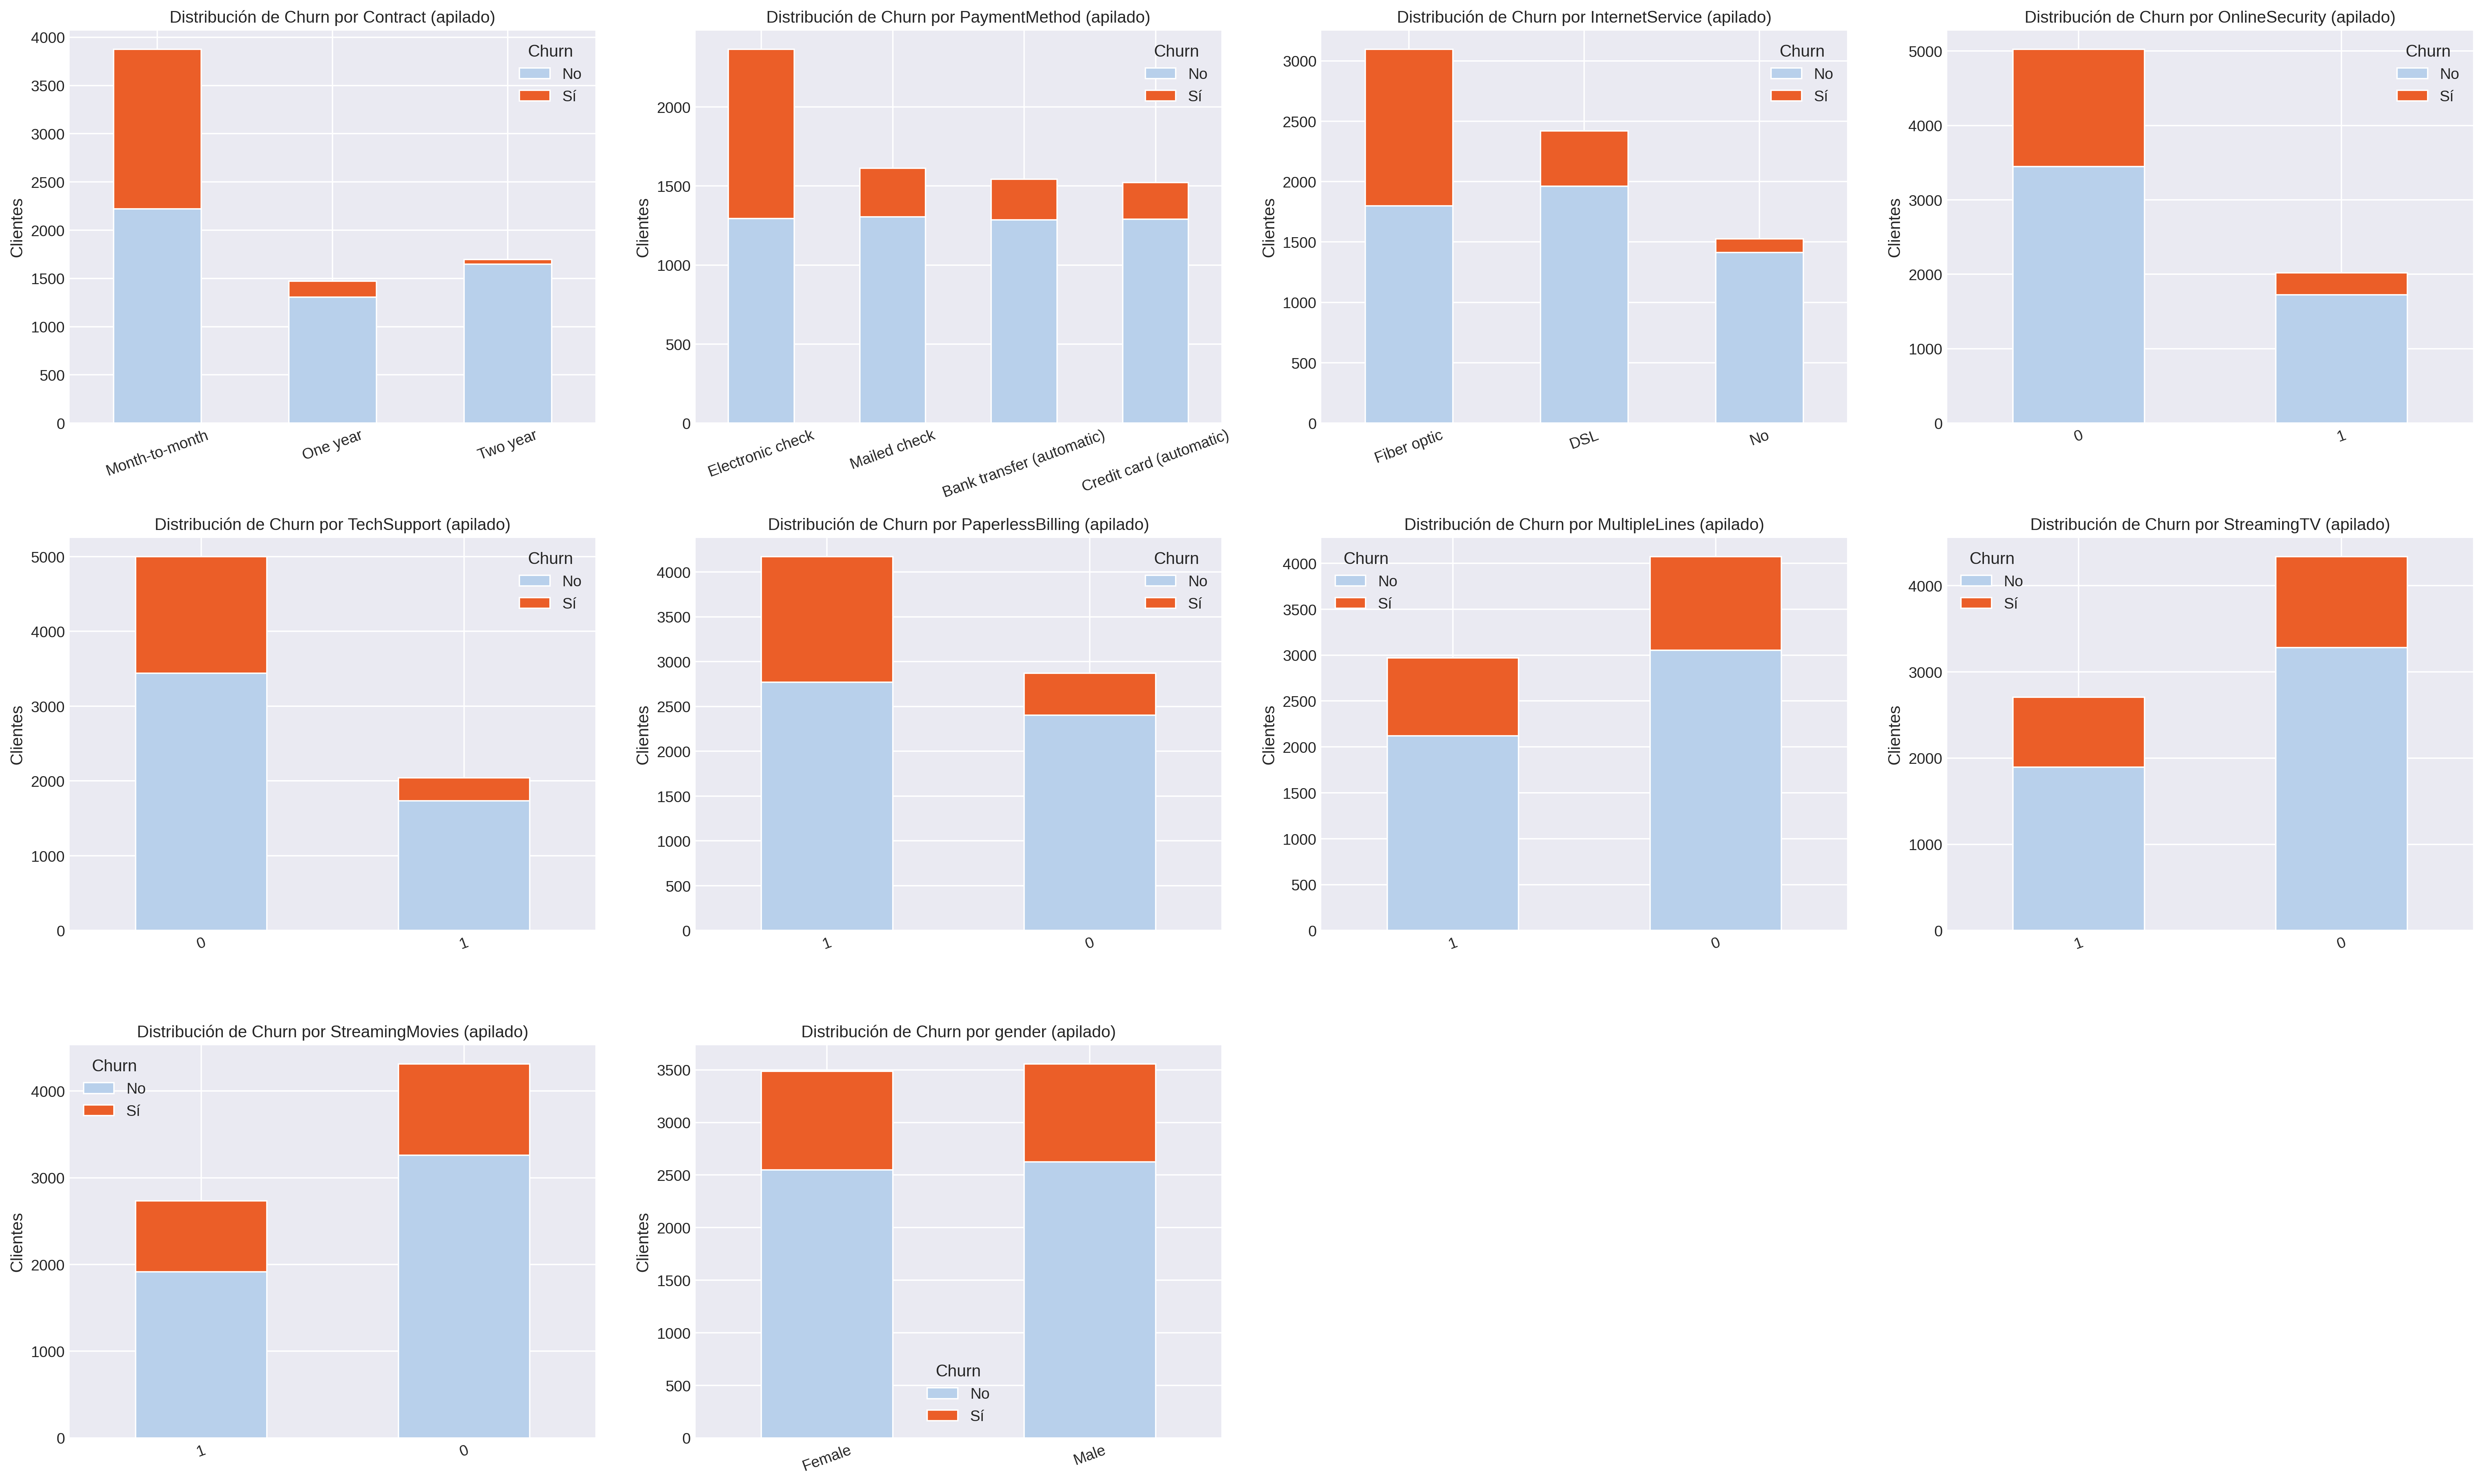

### 4. Conteo de Evasión por Variables Numéricas
Al comparar los clientes que cancelaron (churn) con los que permanecieron (no churn), se observan patrones claros:

  * **Antigüedad (Tenure)**: Los clientes que cancelan suelen hacerlo temprano, con una permanencia promedio de alrededor de 18 meses, frente a casi 38 meses en quienes permanecen.

  * **Cargos mensuales (MonthlyCharges)**: Quienes se dan de baja pagan en promedio más cada mes (≈74 USD) que quienes siguen siendo clientes (≈61 USD).

  * **Cargos totales acumulados (TotalCharges):** Los clientes que se van han pagado menos en total, lo que se explica por su menor tiempo de permanencia.

  * **Gasto diario (Cuentas_Diarias):** Los que cancelan muestran un gasto diario más alto que los que permanecen.

> En resumen, los clientes que cancelan tienden a tener menos tiempo con la empresa, pagar más al mes y presentar un mayor gasto diario.

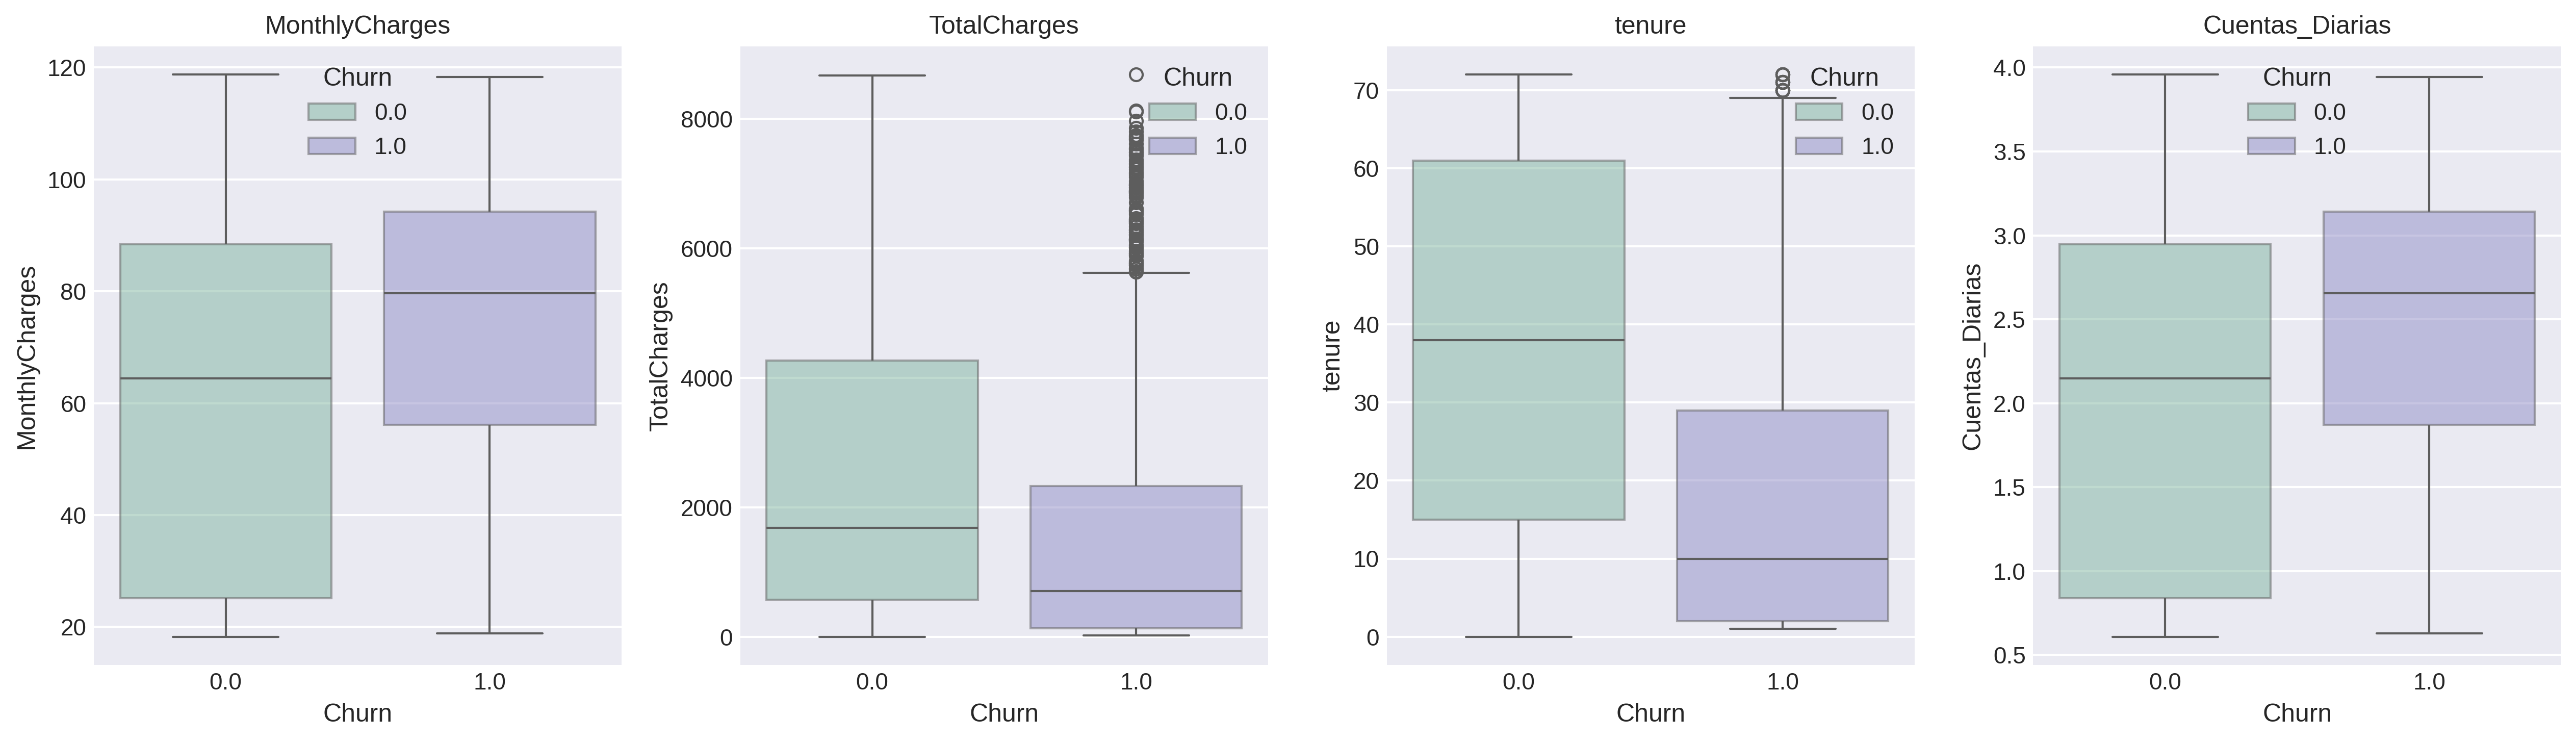

### 5. Análisis de Correlación entre Variables
Se computó la matriz de correlación (Pearson) enfocada en variables derivadas:

- **Cuentas_Diarias y Churn**: Correlación positiva (**0.19**). Un mayor gasto diario se asocia con una probabilidad de churn más alta, lo que sugiere **sensibilidad al precio**. En promedio, clientes con churn gastan un **15% más** por día que los retenidos.
* **Servicios_Contratados y Churn**: Correlación negativa (**-0.35**). Un mayor número de servicios contratados reduce el churn: los retenidos tienen en promedio **4.2 servicios** frente a **3.1** en clientes con churn. Esto apunta a un **mayor valor percibido** como factor de retención.
- **Otras relaciones**: Cuentas_Diarias correlaciona fuertemente con Servicios_Contratados (**0.85**), indicando que bundles más caros tienden a retener clientes si el valor percibido es alto.

**Análisis por quintiles**:

- Para **Cuentas_Diarias**, el churn sube de **10%** en el quintil más bajo a **40%** en el quintil más alto.
- Para **Servicios_Contratados**, el churn cae de **50%** (0-2 servicios) a **<10%** (5 o más servicios).

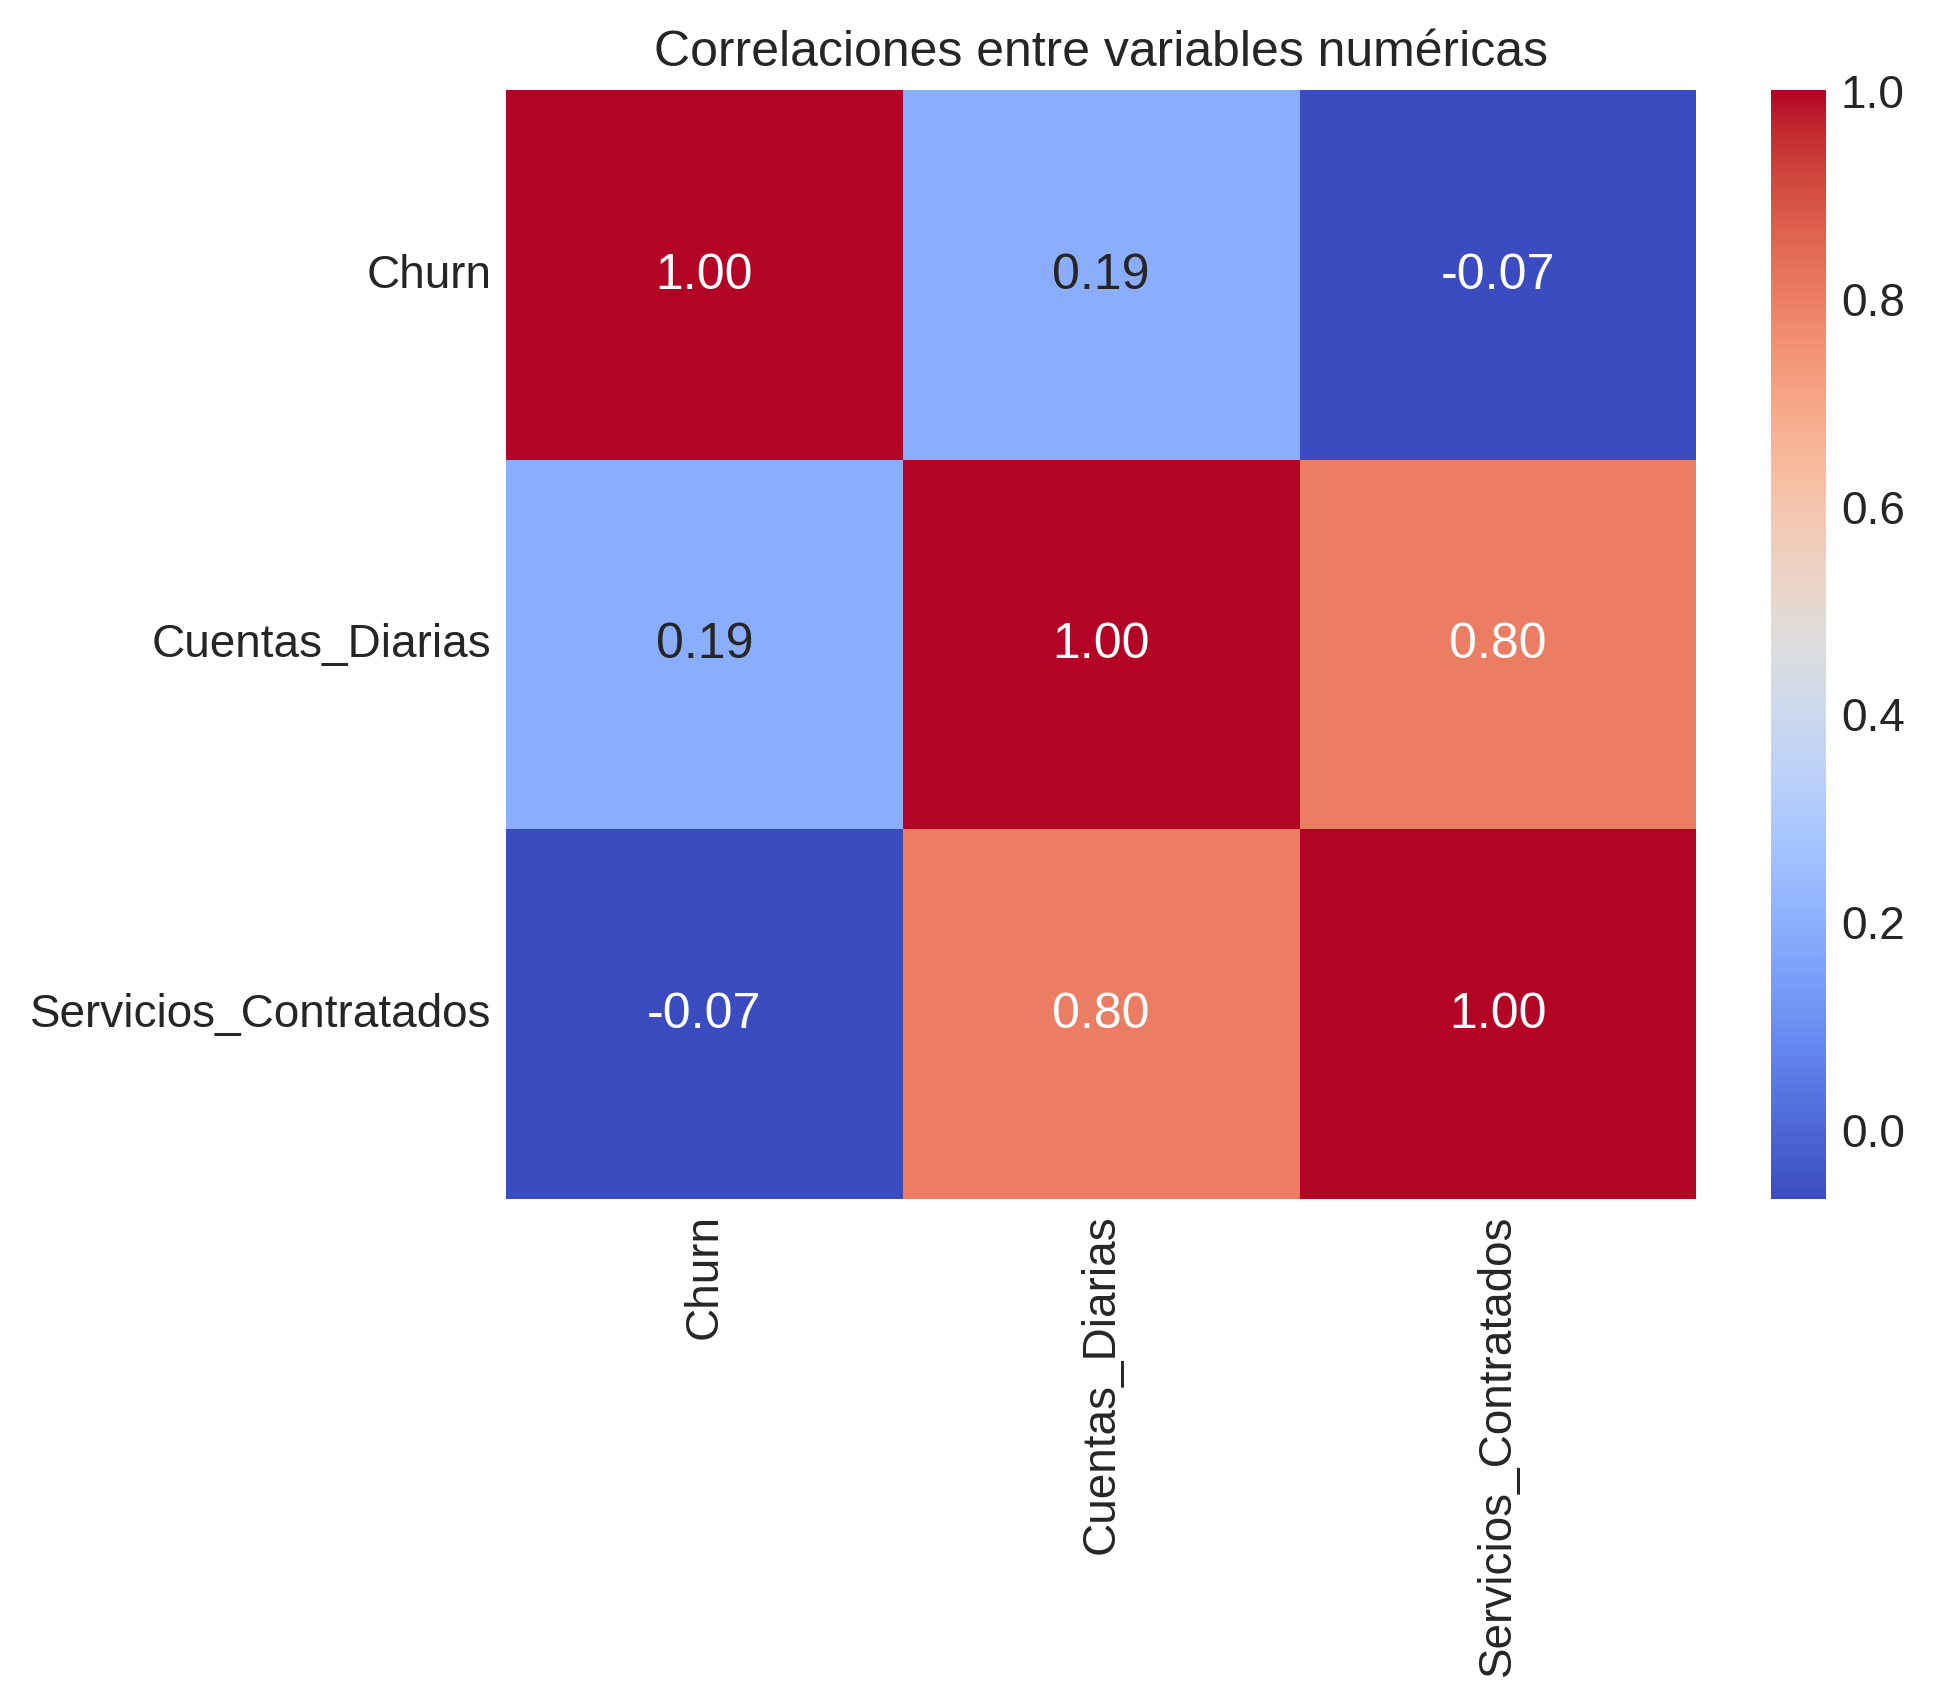

## Conclusiones e Insights

El churn (evasión) no es aleatorio; se debe a patrones claros que podemos usar para retener clientes.



**Conclusión principal sobre churn**: Aproximadamente **1 de cada 4 clientes (26.5%)** abandona Telecom X, con la mayoría de bajas en los **primeros 18 meses**, cuando aún no existe un vínculo sólido con la empresa.
  
**Factores contractuales y de pago:**
    
  - Los **contratos mensuales** triplican el churn frente a contratos anuales.
  - El **pago electrónico** presenta la mayor tasa de cancelación (**45%**), posiblemente por la facilidad de baja online.
        
- **Oferta de servicios e infraestructura:**
    - **Más servicios contratados** reducen la evasión: con **0-2 servicios** el churn es del **50%**, pero con **5 o más** baja a **<10%** (correlación **-0.35**).
    - **Fibra óptica** tiene un churn más alto (**~42%**) que DSL (**19%**) o no tener internet (**7%**), posiblemente por costos.

- **Precio y percepción de valor:**
    
    - Clientes con **Cuentas_Diarias > $2.5** (alto gasto diario) tienen hasta **40% de churn**, frente al **10%** en el quintil más bajo (correlación **0.19**).
    - La combinación de **alto gasto** y **pocos servicios** es un fuerte predictor de fuga.
        
- **Segmentos en riesgo:**
    
    - **Clientes seniors** (65+) muestran mayor evasión (**42%**), posiblemente por mayores necesidades de soporte.
    - **Perfil crítico:** contrato mensual + fibra óptica + pago electornico + bajo número de servicios = **Generan una alta probabildiad de evasión (churn)**.

- **Oportunidades generales**: El churn combina alto gasto inicial con pocos servicios y contratos cortos.


## Recomendaciones

1. **Estrategias contractuales**: Migrar month-to-month a anuales con descuentos (reducir churn 30%).
2. **Bundles personalizados**: Promover servicios adicionales a clientes con <3 (aumentar retención 25%).
3.  **Onboarding reforzado:** En los primeros meses (tenure bajo): soporte proactivo y ofertas personalizadas.
4.  **Fomentar métodos automáticos** (bonificaciones por domiciliación).
5. **Mejorar soporte**: Ofertas especiales para >65 años con soporte gratis.
6. **Modelado**: Usar de IA para predecir churn y automatizar paquetes y ofertas.
7. **Monitoreo**: Dashboards con visualizaciones para trackear churn mensual por  cambios de contrato  y método de pago.